In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
iris = sns.load_dataset("iris")

In [5]:
iris.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [8]:
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

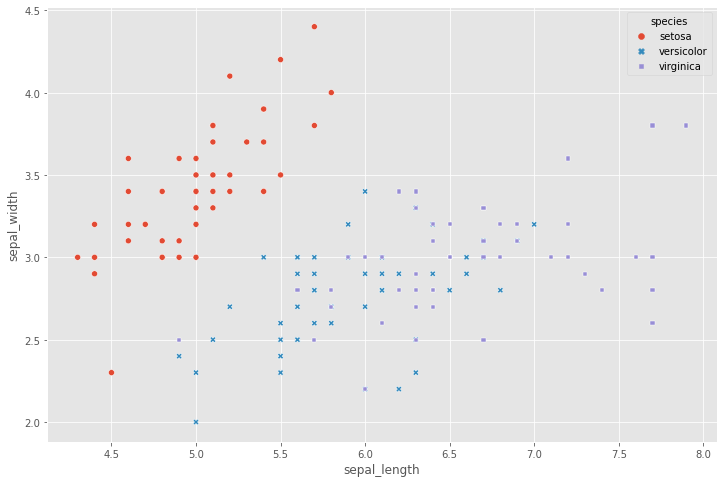

In [9]:
sns.scatterplot(x= iris.sepal_length, y= iris.sepal_width,
               hue= iris.species, style=iris.species)

In [18]:
def standardize_data(arr):
         
    '''
    This function standardize an array, its substracts mean value, 
    and then divide the standard deviation.
    
    param 1: array 
    return: standardized array
    '''    
    rows, columns = arr.shape
    
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    
    for column in range(columns):
        
        mean = np.mean(X[:,column])
        std = np.std(X[:,column])
        tempArray = np.empty(0)
        
        for element in X[:,column]:
            
            tempArray = np.append(tempArray, ((element - mean) / std))
 
        standardizedArray[:,column] = tempArray
    
    return standardizedArray

In [19]:
X = iris.iloc[:, 0:4].values
y = iris.species.values

X = standardize_data(X)

In [21]:
# X

In [22]:
covariance_matrix = np.cov(X.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [24]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("eigen_values: ", eigen_values)
print("eigen_vectors: ", eigen_vectors)

eigen_values:  [2.93808505 0.9201649  0.14774182 0.02085386]
eigen_vectors:  [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [26]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i / sum(eigen_values)) * 100)
    
print(variance_explained)

[72.96244541329987, 22.850761786701753, 3.66892188928288, 0.5178709107154834]


In [28]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 72.96244541  95.8132072   99.48212909 100.        ]


Text(0.5, 1.0, 'Explained variance vs Number of components')

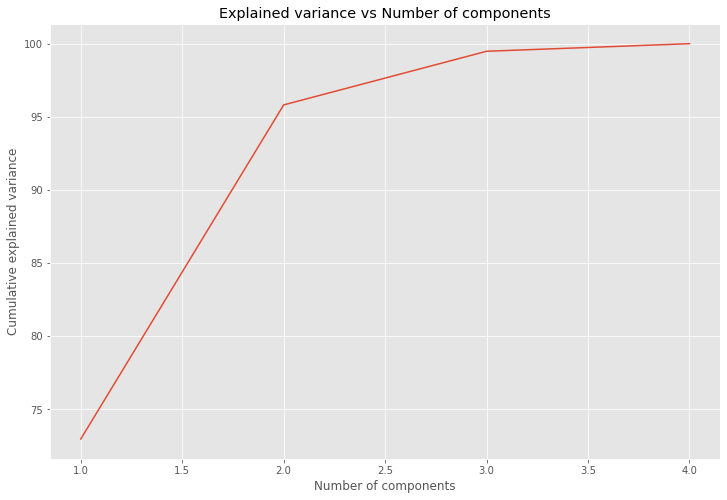

In [32]:
sns.lineplot(x=[1, 2, 3, 4], y= cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

In [29]:
projection_matrix = (eigen_vectors.T[:][:2]).T
print(projection_matrix)

[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [31]:
X_pca = X.dot(projection_matrix)
# print(X_pca)